# DATA Cleaning

Now that we have a better understanding of our data set, let's try to get a cleaner data set.

# Table of Contents
1. [Step 1: Dealing with NaN values](#Step-1:-Dealing-with-NaN-values)
2. [Step 2: Converting data types](#Step-2:-Converting-data-types)
3. [Step 3: Categorical variables](#Step-3:-Categorical_variables)
3. [Step 4: Save our cleaned dataset for reusability](#Step-4:-Save-our-cleaned-dataset-for-reusability)
4. [Conclusion](#Conclusion)

## Step 1: Dealing with NaN values

We noticed during our EDA that specific data variables contain NaN values :
* yr_renovated
* sqft_basement
* view
* waterfront


In [2]:
import pandas as pd
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Year Renovated

In [3]:
# Fill NaN Year Renovated with Yr Built
cleaned_data = data.copy()
cleaned_data['yr_renovated'] = cleaned_data['yr_renovated'].fillna(cleaned_data['yr_built'])

In [4]:
# Fill 0 Year renovated with Yr Built
cleaned_data.loc[cleaned_data['yr_renovated'] == 0, 'yr_renovated'] = cleaned_data.loc[cleaned_data['yr_renovated'] == 0, 'yr_built']
cleaned_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503


In [5]:
cleaned_data.shape

(21597, 21)

### Sqft Basement

In [6]:
# Remove non numerical values and set them to null
print('sqft_basement - Count non numeric values : ', len(cleaned_data.loc[cleaned_data['sqft_basement'] == '?']))
cleaned_data.loc[cleaned_data['sqft_basement'] == '?', 'sqft_basement'] = 0
cleaned_data.head()

sqft_basement - Count non numeric values :  454


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503


### View

In [7]:
# Check different values for view
print(cleaned_data['view'].value_counts())
print('view - Total of missing values : ', cleaned_data['view'].isna().sum())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
view - Total of missing values :  63


In [8]:
# Set missing values to null
cleaned_data['view'].fillna(0, inplace=True)
cleaned_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Waterfront

In [9]:
# Check different values for waterfront
print(cleaned_data['waterfront'].value_counts())
print('Waterfront - Total of missing values : ', cleaned_data['waterfront'].isna().sum())

0.0    19075
1.0      146
Name: waterfront, dtype: int64
Waterfront - Total of missing values :  2376


In [10]:
# Set missing values to null
cleaned_data['waterfront'].fillna(0, inplace=True)
cleaned_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Conclusion** During the NaN/Null values analysis we made the choice of keeping as max as possible entries given values. We did it by assigning default value to the most commonly value in dataset (or mode value). Next step, now that we have cleaned our missing data, let's fix the datatypes.

# Step 2: Converting data types

As shown previously, we have deal with NaN & null values. It is time to convert our dataset with correct datatype.

Looking back to our EDA, we need to convert the following data to the correct datatype:
* date to datetime
* waterfront to bool
* yr_built to datetime
* yr_renovated to datetime

### Transforming date, yr_built, yr_renovated  to datetime

In [11]:
# Transform date to datetime using pd.to_datetime()
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], format='%m/%d/%Y')
cleaned_data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [12]:
# Transform yr_built to datetime
cleaned_data['yr_built'] = pd.to_datetime(cleaned_data['yr_built'], format='%Y')
cleaned_data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built         datetime64[ns]
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [13]:
# Transform yr_renovated to datetime in 2 steps. First converting into int then datetime.
cleaned_data['yr_renovated'] = cleaned_data['yr_renovated'].apply(lambda x: int(x))
cleaned_data['yr_renovated'] = pd.to_datetime(cleaned_data['yr_renovated'], format='%Y')
cleaned_data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built         datetime64[ns]
yr_renovated     datetime64[ns]
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Transforming waterfront to boolean

In [14]:
# Check waterfront values
cleaned_data['waterfront'] = cleaned_data['waterfront'].astype(bool)
cleaned_data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                 bool
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built         datetime64[ns]
yr_renovated     datetime64[ns]
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

# Step 3: Categorical variables

Do we have categorical variables ? We have some insights from our EDA about which are the right candidates but let's dig in.

In [15]:
# Spotting Categorical Variables
cleaned_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


At first glance, we can already spot some categorical variables : condition, grade, bedrooms, bathrooms, floors and maybe view / zipcode

In [16]:
# Check uniqueness
categorical_variables = ['waterfront', 'condition', 'grade', 'bedrooms', 'bathrooms', 'floors', 'view', 'zipcode']

for categorical_variable in categorical_variables:
    print('{} unique values : '. format(categorical_variable), cleaned_data[categorical_variable].nunique())
    
    

waterfront unique values :  2
condition unique values :  5
grade unique values :  11
bedrooms unique values :  12
bathrooms unique values :  29
floors unique values :  6
view unique values :  5
zipcode unique values :  70


We identify that the suspected categorical variables have a limited range. So there is a good chance that they actually are.

Let's plot the price against those variables if we can see any pattern.

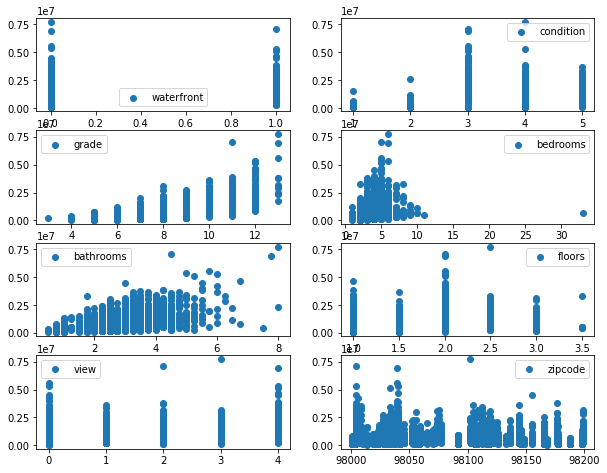

In [17]:
# 
import matplotlib.pyplot as plt
%matplotlib inline

num_lines = len(categorical_variables)//2 + 1
fig = plt.figure(figsize=(10, 10))

for index, xcol in enumerate(categorical_variables):
    plt.subplot(num_lines, 2, index + 1)
    plt.scatter(data=cleaned_data, x=xcol, y='price', label=xcol);
    plt.legend();


**Conclusion** : Plotting them allow us to clearly indentifty categorical data and especially for the zipcode when you look at zipcode > 98150

In [18]:
# Transform  Categorical Variables using one-hot-encoding
categorical_variables = ['waterfront', 'condition', 'grade', 'bedrooms', 'bathrooms', 'floors', 'view', 'zipcode']

water_dummies = pd.get_dummies(cleaned_data['waterfront'], prefix="water")
cond_dummies = pd.get_dummies(cleaned_data['condition'], prefix="cond")
grade_dummies = pd.get_dummies(cleaned_data['grade'], prefix="grade")
bed_dummies = pd.get_dummies(cleaned_data['bedrooms'], prefix='bed')
bath_dummies = pd.get_dummies(cleaned_data['bathrooms'], prefix='bath')
floor_dummies = pd.get_dummies(cleaned_data['floors'], prefix='floor')
view_dummies = pd.get_dummies(cleaned_data['view'], prefix='view')
zipcode_dummies = pd.get_dummies(cleaned_data['zipcode'], prefix='zip')

In [19]:
cleaned_data = cleaned_data.drop(categorical_variables, axis=1)

cleaned_data = pd.concat([
                    cleaned_data,
                    water_dummies,
                    cond_dummies,
                    grade_dummies,
                    bed_dummies,
                    bath_dummies,
                    floor_dummies,
                    view_dummies,
                    zipcode_dummies],
                    axis=1)
cleaned_data.head()

,id,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,2014-10-13,221900.0,1180,5650,1180,0.0,1955-01-01,1955-01-01,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,2570,7242,2170,400.0,1951-01-01,1991-01-01,47.7210,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,770,10000,770,0.0,1933-01-01,1933-01-01,47.7379,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,1960,5000,1050,910.0,1965-01-01,1965-01-01,47.5208,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,1680,8080,1680,0.0,1987-01-01,1987-01-01,47.6168,...,0,0,0,0,0,0,0,0,0,0


# Step 4: Save our cleaned dataset for reusability

Let's save our cleaned dataset to a distinct csv file

In [20]:
# Save clean dataset to cleaned_kc_house_data.csv file
cleaned_data.to_csv('cleaned_kc_house_data.csv', index=False)

# test loading the cleaned dataset file and see if we kept our data cleaning
tested_dataset = pd.read_csv('cleaned_kc_house_data.csv')
tested_dataset.head()

,id,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,2014-10-13,221900.0,1180,5650,1180,0.0,1955-01-01,1955-01-01,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,2570,7242,2170,400.0,1951-01-01,1991-01-01,47.7210,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,770,10000,770,0.0,1933-01-01,1933-01-01,47.7379,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,1960,5000,1050,910.0,1965-01-01,1965-01-01,47.5208,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,1680,8080,1680,0.0,1987-01-01,1987-01-01,47.6168,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Check datatypes
tested_dataset.dtypes

id                 int64
date              object
price            float64
sqft_living        int64
sqft_lot           int64
waterfront          bool
sqft_above         int64
sqft_basement    float64
yr_built          object
yr_renovated      object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
cond_1             int64
cond_2             int64
cond_3             int64
cond_4             int64
cond_5             int64
grade_3            int64
grade_4            int64
grade_5            int64
grade_6            int64
grade_7            int64
grade_8            int64
grade_9            int64
grade_10           int64
grade_11           int64
grade_12           int64
grade_13           int64
                  ...   
zip_98092          int64
zip_98102          int64
zip_98103          int64
zip_98105          int64
zip_98106          int64
zip_98107          int64
zip_98108          int64
zip_98109          int64
zip_98112          int64


In [21]:
# We can see that the datetime format is not kept. Let's fix it
date_columns = ['date', 'yr_built', 'yr_renovated']

for date_column in date_columns:
    tested_dataset[date_column] = pd.to_datetime(tested_dataset[date_column], format='%Y/%m/%d')

tested_dataset.dtypes

id                        int64
date             datetime64[ns]
price                   float64
sqft_living               int64
sqft_lot                  int64
sqft_above                int64
sqft_basement           float64
yr_built         datetime64[ns]
yr_renovated     datetime64[ns]
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
water_False               int64
water_True                int64
cond_1                    int64
cond_2                    int64
cond_3                    int64
cond_4                    int64
cond_5                    int64
grade_3                   int64
grade_4                   int64
grade_5                   int64
grade_6                   int64
grade_7                   int64
grade_8                   int64
grade_9                   int64
grade_10                  int64
grade_11                  int64
grade_12                  int64
                      ...      
zip_9809

# Conclusion
All looks good. We managed to clean our data and implement a way to reuse it once we will work on regression.